In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import json
from sklearn.decomposition import PCA

In [3]:
means = pd.DataFrame(json.load(open('data-02-13-21.json'))).rename(columns={'unnamed.1':'character'})
means = means.set_index('character')

# remove emoji scales, BAP235-266
means = means.drop(columns=[f'BAP{i}' for i in range(35,67)])
means.head()

,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,BAP10,...,BAP259,BAP260,BAP261,BAP262,BAP263,BAP264,BAP265,BAP266,BAP267,BAP268
character,,,,,,,,,,,,,,,,,,,,,
NCIS/1,86.5,82.1,74.8,7.9,31.1,78.1,37.9,20.6,55.7,67.3,...,38.4,57.9,21.1,64.2,23.4,29.4,76.7,32.8,81.9,11.5
NCIS/2,18.5,88.2,24.3,14.4,13.1,40.4,69.7,73.3,48.7,55.0,...,54.8,83.3,84.5,32.1,42.1,64.7,69.2,34.3,70.4,34.3
NCIS/3,16.0,86.3,11.9,64.8,35.9,61.5,15.5,70.2,60.2,22.8,...,18.9,75.2,93.7,49.6,36.0,31.5,22.3,15.9,78.8,13.2
NCIS/4,63.5,64.7,29.1,34.1,24.5,84.2,7.1,49.3,14.1,33.1,...,64.6,55.6,49.2,74.1,59.7,51.4,12.4,29.8,79.1,15.6
NCIS/5,68.6,32.4,42.1,39.8,71.5,67.0,16.8,44.8,21.2,37.2,...,73.8,39.4,36.7,71.5,61.4,45.3,67.5,33.7,76.2,24.8


In [4]:
from sklearn.preprocessing import StandardScaler
#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(means)
means_scaled = scaler.transform(means)

In [5]:
rescaled_means_df = pd.DataFrame(means_scaled, columns = means.columns, index=means.index)
rescaled_means_df.head()

,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,BAP10,...,BAP259,BAP260,BAP261,BAP262,BAP263,BAP264,BAP265,BAP266,BAP267,BAP268
character,,,,,,,,,,,,,,,,,,,,,
NCIS/1,1.239261,0.552947,0.986138,-1.397283,-0.629761,1.069957,-0.211187,-1.167183,0.365184,0.456616,...,-0.745630,0.268326,-1.439073,0.508308,-1.052619,-1.094054,1.302929,-0.765804,1.169502,-1.433115
NCIS/2,-1.676622,0.877916,-1.527045,-1.154299,-1.500514,-0.780413,1.194259,1.218311,0.063877,-0.120362,...,0.103213,1.742622,1.718717,-1.261445,-0.105574,0.789210,0.969238,-0.659032,0.586882,-0.191569
NCIS/3,-1.783824,0.776696,-2.144143,0.729760,-0.397560,0.255205,-1.201187,1.077987,0.558881,-1.630826,...,-1.754925,1.272472,2.176945,-0.296626,-0.414503,-0.982018,-1.117441,-1.968767,1.012448,-1.340544
NCIS/4,0.253006,-0.374014,-1.288168,-0.417871,-0.949037,1.369353,-1.572437,0.131938,-1.425440,-1.147665,...,0.610449,0.134827,-0.039485,1.054119,0.785763,0.079652,-1.557913,-0.979348,1.027646,-1.209855
NCIS/5,0.471698,-2.094753,-0.641210,-0.204793,1.324598,0.525153,-1.143732,-0.071757,-1.119829,-0.955339,...,1.086629,-0.805472,-0.662078,0.910775,0.871858,-0.245785,0.893601,-0.701741,0.880725,-0.708880


In [6]:
pca15 = PCA(15)
pca15.fit(means_scaled)
means_15 = pca15.transform(means_scaled)

In [7]:
def get_top_n(n, pca_obj, feature_list):
    # build columns, then combine into a df
    df_cols = []
    df_cols.append(pca_obj.explained_variance_ratio_)
    num_components = pca_obj.components_.shape[0]
    for i in np.arange(n):
        feat_names_i = []
        feat_vals_i = []
        for j in np.arange(num_components):
            ind_top_vals_sorted = np.argsort(-np.abs(pca15.components_[j]))[:n]
            idx_i = ind_top_vals_sorted[i] # then use that index to grab the value, and append it to the list
            most_important_feat_val = pca_obj.components_[j][idx_i]
            most_important_feat_name = [feature_list[idx_i]]
            feat_names_i.append(most_important_feat_name)
            feat_vals_i.append(most_important_feat_val)
        df_cols.append(feat_names_i)
        df_cols.append(feat_vals_i)
    return pd.DataFrame(df_cols).T

In [35]:
bap_map = json.load(open('dat.json'))
get_top_n(6, pca15, list(bap_map.keys()))
# 216 216 for PCA12 and PCA11

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.246424,[BAP31],-0.12084,[BAP174],-0.1179,[BAP6],-0.116328,[BAP35],-0.11592,[BAP47],-0.114098,[BAP147],-0.113696
1,0.18568,[BAP8],0.133281,[BAP66],0.127251,[BAP151],0.126459,[BAP96],-0.124851,[BAP1],-0.122758,[BAP62],0.119925
2,0.147666,[BAP101],0.145358,[BAP110],0.14274,[BAP71],-0.141562,[BAP70],-0.139768,[BAP145],-0.13863,[BAP228],-0.135568
3,0.0748363,[BAP55],-0.200479,[BAP9],0.196618,[BAP133],-0.196422,[BAP106],-0.191982,[BAP81],0.191392,[BAP214],0.171867
4,0.0513832,[BAP82],-0.189983,[BAP45],-0.179577,[BAP144],-0.170795,[BAP16],0.169761,[BAP120],-0.166503,[BAP48],-0.166355
5,0.0275237,[BAP121],0.25553,[BAP38],0.232028,[BAP77],-0.231812,[BAP225],-0.219491,[BAP79],0.202533,[BAP20],-0.200249
6,0.026508,[BAP85],0.175756,[BAP171],0.171445,[BAP217],-0.161552,[BAP3],-0.161175,[BAP34],-0.156511,[BAP152],0.153302
7,0.0256086,[BAP127],-0.240314,[BAP18],0.203324,[BAP42],-0.188824,[BAP99],0.166402,[BAP67],-0.159478,[BAP155],0.154566
8,0.0150495,[BAP4],0.200763,[BAP231],0.190834,[BAP155],0.183596,[BAP89],-0.174288,[BAP75],0.172866,[BAP77],-0.172111
9,0.0123782,[BAP67],-0.217847,[BAP48],-0.199651,[BAP53],-0.147499,[BAP68],0.142204,[BAP212],-0.139627,[BAP138],-0.139209


In [9]:
pca15.explained_variance_ratio_.sum()

0.853366577132964

In [10]:
means_15.shape

(800, 15)

# PCA3

In [56]:
means.reset_index()['character']

0      NCIS/1
1      NCIS/2
2      NCIS/3
3      NCIS/4
4      NCIS/5
        ...  
795    MCU/11
796    MCU/12
797    MCU/13
798    MCU/14
799    MCU/15
Name: character, Length: 800, dtype: object

In [101]:
pca3 = PCA(3)
means3 = pca3.fit_transform(means_scaled)
pc3_df = pd.DataFrame(data = means3
             ,columns = ['principal component 1', 'principal component 2', 'principal component 3'])
chars_comps = pd.concat([pc3_df, means.reset_index()['character']], axis=1)

In [65]:
get_top_n(5, pca3, list(bap_map.values()))
# 216 216 for PCA12 and PCA11

,0,1,2,3,4,5,6,7,8,9,10
0,0.246424,[rude<->respectful],-0.12084,[apprentice<->master],-0.1179,[lewd<->tasteful],-0.116328,[emotional<->logical],-0.11592,[spontaneous<->deliberate],-0.114098
1,0.18568,[strict<->lenient],0.133281,[frugal<->lavish],0.127251,[vague<->precise],0.126459,[politically correct<->edgy],-0.124851,[playful<->serious],-0.122758
2,0.147666,[biased<->impartial],0.145358,[vain<->demure],0.14274,[down2earth<->head@clouds],-0.141562,[young<->old],-0.139768,[high IQ<->low IQ],-0.13863


In [200]:
rescaled_means_df

,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,BAP10,...,BAP259,BAP260,BAP261,BAP262,BAP263,BAP264,BAP265,BAP266,BAP267,BAP268
character,,,,,,,,,,,,,,,,,,,,,
NCIS/1,1.239261,0.552947,0.986138,-1.397283,-0.629761,1.069957,-0.211187,-1.167183,0.365184,0.456616,...,-0.745630,0.268326,-1.439073,0.508308,-1.052619,-1.094054,1.302929,-0.765804,1.169502,-1.433115
NCIS/2,-1.676622,0.877916,-1.527045,-1.154299,-1.500514,-0.780413,1.194259,1.218311,0.063877,-0.120362,...,0.103213,1.742622,1.718717,-1.261445,-0.105574,0.789210,0.969238,-0.659032,0.586882,-0.191569
NCIS/3,-1.783824,0.776696,-2.144143,0.729760,-0.397560,0.255205,-1.201187,1.077987,0.558881,-1.630826,...,-1.754925,1.272472,2.176945,-0.296626,-0.414503,-0.982018,-1.117441,-1.968767,1.012448,-1.340544
NCIS/4,0.253006,-0.374014,-1.288168,-0.417871,-0.949037,1.369353,-1.572437,0.131938,-1.425440,-1.147665,...,0.610449,0.134827,-0.039485,1.054119,0.785763,0.079652,-1.557913,-0.979348,1.027646,-1.209855
NCIS/5,0.471698,-2.094753,-0.641210,-0.204793,1.324598,0.525153,-1.143732,-0.071757,-1.119829,-0.955339,...,1.086629,-0.805472,-0.662078,0.910775,0.871858,-0.245785,0.893601,-0.701741,0.880725,-0.708880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCU/11,1.505121,1.229523,1.578354,-1.419712,0.110380,-0.618444,0.531313,-1.778268,0.576099,1.376029,...,-1.346031,-1.461359,-1.135248,-1.393763,-0.920945,-1.723587,-0.352177,1.469288,-1.596676,0.788600
MCU/12,0.754710,0.648840,-0.377450,0.924147,-1.282826,1.388986,-0.670830,-0.927276,-1.145655,-0.317379,...,0.434469,0.750084,-0.467829,1.401454,-1.153908,-1.302120,-0.752606,-1.007820,1.063110,-0.997485
MCU/13,-1.350729,0.835298,0.438712,0.000808,-1.171563,-0.481016,-1.121633,0.403531,-0.611911,1.540210,...,-1.201106,1.667166,1.235585,-1.195286,-0.252442,-0.117744,-1.299859,-0.082464,0.363966,0.037137


In [16]:
get_top_n(5, pca3, list(bap_map.values()))
# 216 216 for PCA12 and PCA11

,0,1,2,3,4,5,6,7,8,9,10
0,0.246424,[rude<->respectful],-0.12084,[apprentice<->master],-0.1179,[lewd<->tasteful],-0.116328,[emotional<->logical],-0.11592,[spontaneous<->deliberate],-0.114098
1,0.18568,[strict<->lenient],0.133281,[frugal<->lavish],0.127251,[vague<->precise],0.126459,[politically correct<->edgy],-0.124851,[playful<->serious],-0.122758
2,0.147666,[biased<->impartial],0.145358,[vain<->demure],0.14274,[down2earth<->head@clouds],-0.141562,[young<->old],-0.139768,[high IQ<->low IQ],-0.13863


In [17]:
pca3.explained_variance_ratio_.sum()

0.5797692189633512

In [69]:
from bs4 import BeautifulSoup
import os

In [76]:
codebook_soup = BeautifulSoup(open("codebook.html"))

In [79]:
codebook_soup
table = codebook_soup.find("table")


rows=list()
for row in table.findAll("tr"):
   rows.append(row)

In [105]:
l = []
for tr in rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
chars = pd.DataFrame(l[1:], columns=["character", "Show", "name"])

In [114]:
merged_chars_comps = chars_comps.merge(chars, on='character')
ch = merged_chars_comps[['name', 'Show', 'principal component 1', 'principal component 2', 'principal component 3']]
ch.to_csv("characters-pca3-components.csv")

In [214]:
top_10_pc1 = ch.sort_values(by='principal component 1', ascending=True)
bot_10_pc1 = ch.sort_values(by='principal component 1', ascending=False)

top_10_pc2 = ch.sort_values(by='principal component 2', ascending=True)
bot_10_pc2 = ch.sort_values(by='principal component 2', ascending=False)

top_10_pc3 = ch.sort_values(by='principal component 3', ascending=True)
bot_10_pc3 = ch.sort_values(by='principal component 3', ascending=False)



In [217]:
top10_pos_neg1 = pd.concat([top_10_pc1[0:10], bot_10_pc1[0:10]], axis=0).sort_values('principal component 1')
top10_pos_neg1['name_show'] = top10_pos_neg1['name'] + " (" + top10_pos_neg1['Show'] + ")"

top10_pos_neg2 = pd.concat([top_10_pc2[0:10], bot_10_pc2[0:10]], axis=0).sort_values('principal component 2')
top10_pos_neg2['name_show'] = top10_pos_neg2['name'] + " (" + top10_pos_neg2['Show'] + ")"

top10_pos_neg3 = pd.concat([top_10_pc3[0:10], bot_10_pc3[0:10]], axis=0).sort_values('principal component 3')
top10_pos_neg3['name_show'] = top10_pos_neg3['name'] + " (" + top10_pos_neg3['Show'] + ")"

In [218]:
top10_pos_neg3

,name,Show,principal component 1,principal component 2,principal component 3,name_show
541,Samantha Jones,Sex and the City,6.118428,-0.192031,-14.981068,Samantha Jones (Sex and the City)
244,Goh Peik Lin,Crazy Rich Asians,3.147475,10.521899,-14.612541,Goh Peik Lin (Crazy Rich Asians)
96,Robin Hood,Robin Hood,-1.875314,5.084213,-14.587470,Robin Hood (Robin Hood)
587,Lady Sybil Crawley,Downton Abbey,-5.715856,5.629657,-13.197379,Lady Sybil Crawley (Downton Abbey)
239,Nymphadora Tonks,Harry Potter,1.593283,5.096855,-13.089020,Nymphadora Tonks (Harry Potter)
432,Tyler Durden,Fight Club,10.621039,-1.442251,-13.069243,Tyler Durden (Fight Club)
2,Abby Sciuto,NCIS,-4.351082,4.710739,-12.866520,Abby Sciuto (NCIS)
743,Arya Stark,Game of Thrones,2.333791,-5.820541,-12.524815,Arya Stark (Game of Thrones)
637,Omar Little,The Wire,0.931933,-6.094451,-12.503782,Omar Little (The Wire)
300,Jack Sparrow,Pirates of the Caribbean,11.328419,7.032304,-12.264207,Jack Sparrow (Pirates of the Caribbean)


<BarContainer object of 20 artists>

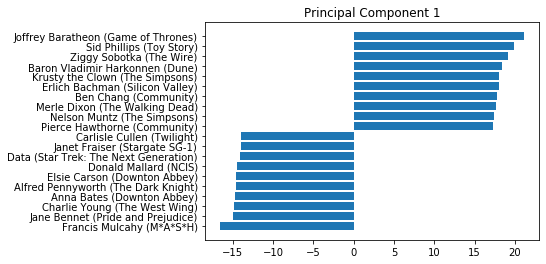

In [219]:
import matplotlib.pyplot as plt

plt.title('Principal Component 1')
plt.barh(y = top10_pos_neg1['name_show'],
        width = top10_pos_neg1['principal component 1'])

<BarContainer object of 20 artists>

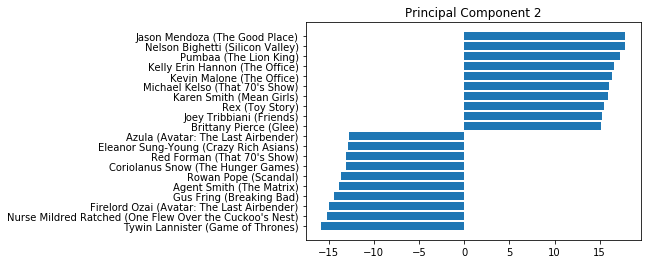

In [220]:
plt.title('Principal Component 2')
plt.barh(y = top10_pos_neg2['name_show'],
        width = top10_pos_neg2['principal component 2'])

<BarContainer object of 20 artists>

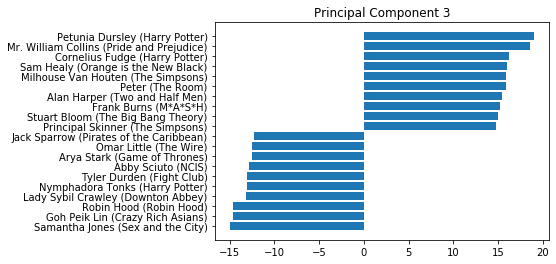

In [221]:
plt.title('Principal Component 3')
plt.barh(y = top10_pos_neg3['name_show'],
        width = top10_pos_neg3['principal component 3'])